In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
class SSE:
    
    def __init__(self, X, y):
        self.data = X
        self.target = y
        
    def sse(self):
        
        squared_errors = (self.target - (self.data)) ** 2
        return np.sum(squared_errors)

In [3]:
def pretty_print_SSE(SSE_obj):
    '''returns report of statistics for a given model object'''
    print('sse:', SSE_obj.sse())

In [4]:
# getting ID of B column

In [5]:
df1_1000=pd.read_csv("createdflow1000.csv")
df1_1000=df1_1000.drop(df1_1000.columns[[ 0]], axis=1) # inserting ceated flow 1500 made by me
df1_1000.head()

,parent1_1000,parent2_1000,total_flows
0,400381361,400381361,1685
1,1614609930,400381361,1567
2,400381361,400381361,38
3,1001672364,400381361,6
4,1001672364,400381361,2


In [6]:
df2_1000=pd.read_csv("dfflow1000_3.csv")
df2_1000=df2_1000.drop(df2_1000.columns[[ 0]], axis=1)
df2_1000.head()

,from_cellid,to_cellid,total_flows
0,1669783857,573601754,155
1,1669783857,1012251082,117
2,1669783857,1761235633,109
3,1669783857,1993249729,70
4,1669783857,450818450,174


In [7]:
df3_1000=df2_1000.merge(df1_1000,left_on=["from_cellid","to_cellid"],right_on=["parent1_1000","parent2_1000"])
df3_1000.head()

,from_cellid,to_cellid,total_flows_x,parent1_1000,parent2_1000,total_flows_y
0,1669783857,1012251082,117,1669783857,1012251082,25
1,1669783857,1012251082,117,1669783857,1012251082,46
2,1669783857,1012251082,117,1669783857,1012251082,28
3,1669783857,1012251082,117,1669783857,1012251082,45
4,1669783857,1012251082,117,1669783857,1012251082,2


In [8]:
df33_1000=df3_1000.groupby(["parent1_1000","parent2_1000"]).agg({"total_flows_x":"min","total_flows_y":"sum"})
df33_1000.head()

total_flows_x  total_flows_y
parent1_1000 parent2_1000                              
499416       894355789                46             43
             1174053714                8              8
             1442048941               23              3
             1459719841               33             47
676626       1366793726                3              2

In [9]:
df33_1000.shape
                        

(59959, 2)

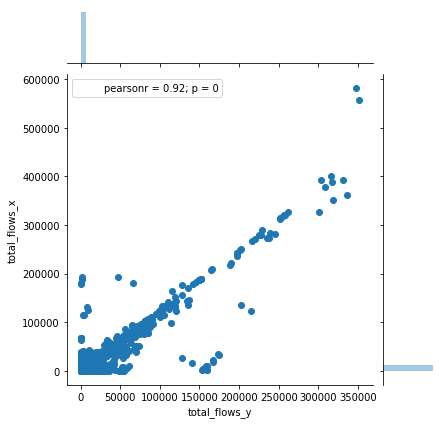

In [10]:
sns.jointplot(x='total_flows_y',y='total_flows_x',data=df33_1000,kind='scatter')

In [11]:
stats.pearsonr(df33_1000.total_flows_y, df33_1000.total_flows_x)

(0.92315872157603851, 0.0)

In [12]:
stats.spearmanr(df33_1000.total_flows_y, df33_1000.total_flows_x)

SpearmanrResult(correlation=0.84713233209542038, pvalue=0.0)

# Evaluating createdflow 1500 

In [13]:
df1_1500=pd.read_csv("createdflow1500.csv")
df1_1500=df1_1500.drop(df1_1500.columns[[ 0]], axis=1) # inserting ceated flow 1500 made by me
df1_1500.head()

,parent1_1500,parent2_1500,total_flows
0,1803986340,1803986340,1685
1,1803986340,1803986340,38
2,1803986340,1803986340,1470
3,1803986340,1803986340,1598
4,1803986340,1803986340,16


In [14]:
df2_1500=pd.read_csv("dfflow1500_3.csv")
df2_1500=df2_1500.drop(df2_1500.columns[[ 0]], axis=1)  # inserting flow1500 given by professor
df2_1500.head()

,from_cellid,to_cellid,total_flows
0,1803986340,1700261407,2070
1,1803986340,649076654,4655
2,1803986340,1139373154,6063
3,1803986340,304769964,66
4,1803986340,491026571,35


In [15]:
df3_1500=df2_1500.merge(df1_1500,left_on=["from_cellid","to_cellid"],right_on=["parent1_1500","parent2_1500"])
                        

In [16]:
df3_1500.head()

,from_cellid,to_cellid,total_flows_x,parent1_1500,parent2_1500,total_flows_y
0,1803986340,1700261407,2070,1803986340,1700261407,1723
1,1803986340,1700261407,2070,1803986340,1700261407,47
2,1803986340,649076654,4655,1803986340,649076654,7
3,1803986340,649076654,4655,1803986340,649076654,61
4,1803986340,649076654,4655,1803986340,649076654,2834


In [17]:
df33_1500=df3_1500.groupby(["parent1_1500","parent2_1500"]).agg({"total_flows_x":"min","total_flows_y":"sum"})

In [18]:
df33_1500.head()

total_flows_x  total_flows_y
parent1_1500 parent2_1500                              
410030       266091396                 2              1
             1250154088                7              6
             1788704020                1              3
754032       59327488               2028           1773
             222597220               407            840

In [19]:
df33_1500.shape

(30625, 2)

In [20]:
d_1500=SSE(df33_1500.total_flows_x,df33_1500.total_flows_y)
pretty_print_SSE(d_1500)

sse: 631962686216


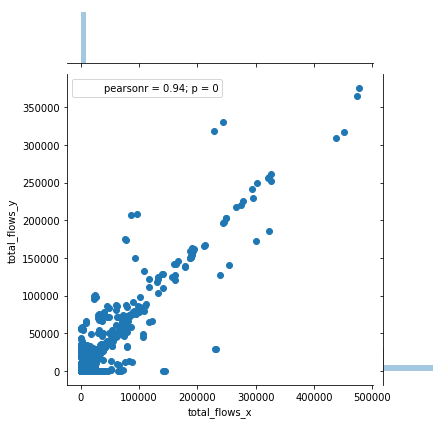

In [21]:

sns.jointplot(x='total_flows_x',y='total_flows_y',data=df33_1500,kind='scatter')
plt.savefig("approximate 1000-1500_Step.png")

In [22]:
stats.pearsonr(df33_1500.total_flows_y, df33_1500.total_flows_x)

(0.94025937572278817, 0.0)

In [23]:
stats.spearmanr(df33_1500.total_flows_y, df33_1500.total_flows_x)

SpearmanrResult(correlation=0.83476380897072344, pvalue=0.0)

# Evaluating createdflow1500_jump with dfflow1500 ,which professor gave 


In [24]:
df1_1500_jump=pd.read_csv("createdflow1500_jump.csv")
df1_1500_jump=df1_1500_jump.drop(df1_1500_jump.columns[[ 0]], axis=1)
df1_1500_jump.head()

,parent1_1500,parent2_1500,total_flows
0,1803986340,1803986340,1685
1,1803986340,1803986340,1567
2,1803986340,1803986340,38
3,1803986340,1803986340,6
4,1803986340,1803986340,2


In [25]:
df2_1500=pd.read_csv("dfflow1500_3.csv")  # inserting the dfflow1500 which professor gave me
df2_1500=df2_1500.drop(df2_1500.columns[[ 0]], axis=1)
df2_1500.head()

,from_cellid,to_cellid,total_flows
0,1803986340,1700261407,2070
1,1803986340,649076654,4655
2,1803986340,1139373154,6063
3,1803986340,304769964,66
4,1803986340,491026571,35


In [26]:
df3_1500_jump=df2_1500.merge(df1_1500_jump,left_on=["from_cellid","to_cellid"],right_on=["parent1_1500","parent2_1500"])
df3_1500_jump.head()

,from_cellid,to_cellid,total_flows_x,parent1_1500,parent2_1500,total_flows_y
0,1803986340,1700261407,2070,1803986340,1700261407,1
1,1803986340,649076654,4655,1803986340,649076654,1705
2,1803986340,649076654,4655,1803986340,649076654,32
3,1803986340,649076654,4655,1803986340,649076654,56
4,1803986340,649076654,4655,1803986340,649076654,5


In [27]:
df33_1500_jump=df3_1500_jump.groupby(["parent1_1500","parent2_1500"]).agg({"total_flows_x":"min","total_flows_y":"sum"})
df33_1500_jump.head()

total_flows_x  total_flows_y
parent1_1500 parent2_1500                              
410030       266091396                 2              6
             1250154088                7              7
             1788704020                1              4
754032       59327488               2028           1939
             222597220               407            535

In [28]:
d_1500_jump=SSE(df33_1500_jump.total_flows_x,df33_1500_jump.total_flows_y)
pretty_print_SSE(d_1500_jump)

sse: 649193184619


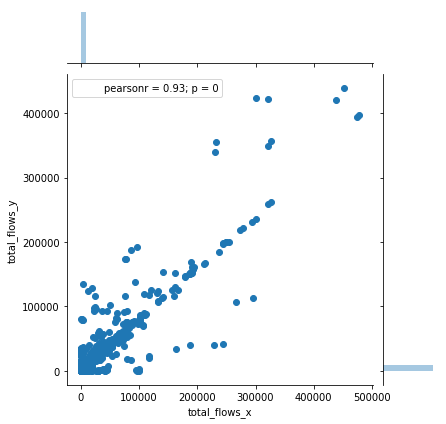

In [29]:
sns.jointplot(x='total_flows_x',y='total_flows_y',data=df33_1500_jump,kind='scatter')
#plt.xlim([10000,20000])
#plt.ylim([10,1000])
#,xlim=[0,100],ylim=[0,100]
plt.savefig("approximate 200-1500_Jump.png")

In [30]:
stats.pearsonr(df33_1500_jump.total_flows_y, df33_1500_jump.total_flows_x)

(0.93239216207669462, 0.0)

In [31]:
stats.spearmanr(df33_1500_jump.total_flows_y, df33_1500_jump.total_flows_x)

SpearmanrResult(correlation=0.85192357059854951, pvalue=0.0)

# Evaluating createdflow 2000 with the flow2000 which professor gave

In [32]:
df1_2000=pd.read_csv("createdflow2000.csv")
df1_2000=df1_2000.drop(df1_2000.columns[[ 0]], axis=1)
df1_2000.head()

,parent1_2000,parent2_2000,total_flows
0,826759449,826759449,1685
1,826759449,826759449,38
2,826759449,826759449,1470
3,826759449,826759449,1598
4,826759449,826759449,16


In [33]:
df2_2000=pd.read_csv("dfflow2000_3.csv")
df2_2000=df2_2000.drop(df2_2000.columns[[ 0]], axis=1)
df2_2000.head()

,from_cellid,to_cellid,total_flows
0,445467196,1755583133,119095
1,445467196,599265282,403037
2,445467196,2097669802,212750
3,445467196,1413558430,303113
4,445467196,271488817,65117


In [34]:
df3_2000=df2_2000.merge(df1_2000,left_on=["from_cellid","to_cellid"],right_on=["parent1_2000","parent2_2000"])
df3_2000.head()

,from_cellid,to_cellid,total_flows_x,parent1_2000,parent2_2000,total_flows_y
0,445467196,1755583133,119095,445467196,1755583133,10606
1,445467196,1755583133,119095,445467196,1755583133,4613
2,445467196,1755583133,119095,445467196,1755583133,10654
3,445467196,1755583133,119095,445467196,1755583133,6358
4,445467196,1755583133,119095,445467196,1755583133,15008


In [35]:
df33_2000=df3_2000.groupby(["parent1_2000","parent2_2000"]).agg({"total_flows_x":"min","total_flows_y":"sum"})
df33_2000.head()

total_flows_x  total_flows_y
parent1_2000 parent2_2000                              
201098       739765175               366            293
             1338314734                8              6
             1393739907              416            324
201451       420110196                48             75
             647139599                50             16

In [36]:
df33_2000.shape

(19246, 2)

In [37]:
d_2000=SSE(df33_2000.total_flows_x,df33_2000.total_flows_y)
pretty_print_SSE(d_2000)

sse: 789509162520


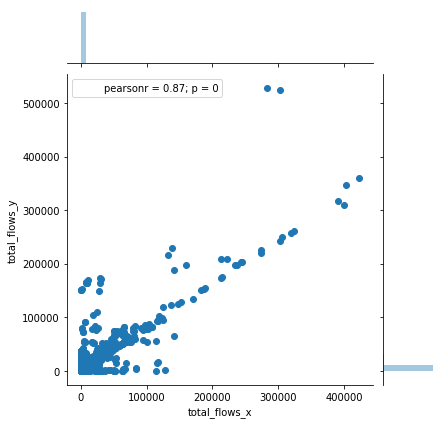

In [38]:
sns.jointplot(x='total_flows_x',y='total_flows_y',data=df33_2000,kind='scatter')
plt.savefig("approximate 1500-2000_step.png")

In [39]:
stats.pearsonr(df33_2000.total_flows_y, df33_2000.total_flows_x)

(0.87336295269380193, 0.0)

In [40]:
stats.spearmanr(df33_2000.total_flows_y, df33_2000.total_flows_x)

SpearmanrResult(correlation=0.83654140498675533, pvalue=0.0)

# Evaluating createdflow2000_jump with dfflow2000 ,which professor gave


In [41]:
df1_2000_jump=pd.read_csv("createdflow2000_jump.csv")
df1_2000_jump=df1_2000_jump.drop(df1_2000_jump.columns[[ 0]], axis=1)
df1_2000_jump.head()

,parent1_2000,parent2_2000,total_flows
0,826759449,826759449,1685
1,826759449,826759449,1567
2,826759449,826759449,38
3,826759449,826759449,6
4,826759449,826759449,2


In [42]:
df2_2000=pd.read_csv("dfflow2000_3.csv")  # inserting the dfflow1500 which professor gave me
df2_2000=df2_2000.drop(df2_2000.columns[[ 0]], axis=1)
df2_2000.head()

,from_cellid,to_cellid,total_flows
0,445467196,1755583133,119095
1,445467196,599265282,403037
2,445467196,2097669802,212750
3,445467196,1413558430,303113
4,445467196,271488817,65117


In [43]:
df3_2000_jump=df2_2000.merge(df1_2000_jump,left_on=["from_cellid","to_cellid"],right_on=["parent1_2000","parent2_2000"])
df3_2000_jump.head()

,from_cellid,to_cellid,total_flows_x,parent1_2000,parent2_2000,total_flows_y
0,445467196,1755583133,119095,445467196,1755583133,22479
1,445467196,1755583133,119095,445467196,1755583133,6358
2,445467196,1755583133,119095,445467196,1755583133,4064
3,445467196,1755583133,119095,445467196,1755583133,4936
4,445467196,1755583133,119095,445467196,1755583133,15008


In [44]:
df33_2000_jump=df3_2000_jump.groupby(["parent1_2000","parent2_2000"]).agg({"total_flows_x":"min","total_flows_y":"sum"})
df33_2000_jump.head()

total_flows_x  total_flows_y
parent1_2000 parent2_2000                              
201098       739765175               366            293
             1338314734                8              5
             1393739907              416            323
201451       420110196                48             49
             647139599                50             50

In [45]:
d_2000_jump=SSE(df33_2000_jump.total_flows_x,df33_2000_jump.total_flows_y)
pretty_print_SSE(d_2000_jump)

sse: 673794066536


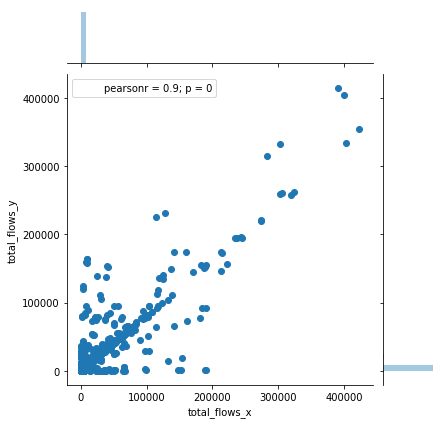

In [46]:
sns.jointplot(x='total_flows_x',y='total_flows_y',data=df33_2000_jump,kind='scatter')
#plt.xlim([10000,20000])
#plt.ylim([10,1000])
#,xlim=[0,100],ylim=[0,100]
plt.savefig("approximate 200-2000_Jump.png")

In [47]:
stats.pearsonr(df33_2000_jump.total_flows_y, df33_2000_jump.total_flows_x)

(0.89788249676463316, 0.0)

In [48]:
stats.spearmanr(df33_2000_jump.total_flows_y, df33_2000_jump.total_flows_x)

SpearmanrResult(correlation=0.85283993130561875, pvalue=0.0)

# Evaluating createdflow 2500 with the flow2500 which professor gave

In [49]:
df1_2500=pd.read_csv("createdflow2500.csv")
df1_2500=df1_2500.drop(df1_2500.columns[[ 0]], axis=1)
df1_2500.head()

,parent1_2500,parent2_2500,total_flows
0,623837370,623837370,1685
1,623837370,623837370,38
2,623837370,623837370,1470
3,623837370,623837370,1598
4,623837370,623837370,16


In [50]:
df2_2500=pd.read_csv("dfflow2500_3.csv")
df2_2500=df2_2500.drop(df2_2500.columns[[ 0]], axis=1)
df2_2500.head()

,from_cellid,to_cellid,total_flows
0,623837370,1721207829,7831
1,623837370,2090535958,4312
2,623837370,849515361,2003
3,623837370,1519190990,5148
4,623837370,148222723,57


In [51]:
df3_2500=df2_2500.merge(df1_2500,left_on=["from_cellid","to_cellid"],right_on=["parent1_2500","parent2_2500"])
df3_2500.head()

,from_cellid,to_cellid,total_flows_x,parent1_2500,parent2_2500,total_flows_y
0,623837370,1721207829,7831,623837370,1721207829,1723
1,623837370,1721207829,7831,623837370,1721207829,47
2,623837370,1721207829,7831,623837370,1721207829,12
3,623837370,1721207829,7831,623837370,1721207829,16
4,623837370,1721207829,7831,623837370,1721207829,22


In [52]:
df33_2500=df3_2500.groupby(["parent1_2500","parent2_2500"]).agg({"total_flows_x":"min","total_flows_y":"sum"})
df33_2500.head()

total_flows_x  total_flows_y
parent1_2500 parent2_2500                              
461371       6518397                 124            168
             118130260               109            287
             227666119                43            103
             1609638725                2             10
             1653316341              336            250

In [53]:
df33_2500.shape

(12669, 2)

In [54]:
d_2500=SSE(df33_2500.total_flows_x,df33_2500.total_flows_y)
pretty_print_SSE(d_2500)

sse: 783935719379


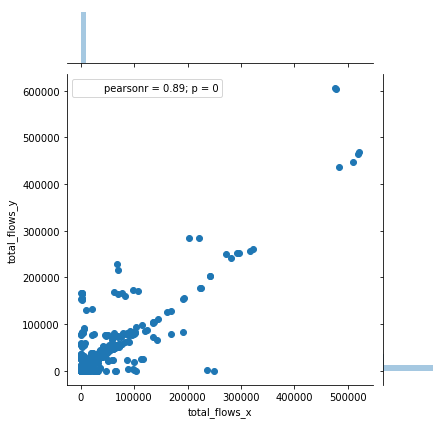

In [55]:
sns.jointplot(x='total_flows_x',y='total_flows_y',data=df33_2500,kind='scatter')
plt.savefig("approximate 2000-2500_Step.png")

In [56]:
stats.pearsonr(df33_2500.total_flows_y, df33_2500.total_flows_x)

(0.88809241914655701, 0.0)

In [57]:
stats.spearmanr(df33_2500.total_flows_y, df33_2500.total_flows_x)

SpearmanrResult(correlation=0.80683091771198456, pvalue=0.0)

 # Evaluating createdflow2500_jump with dfflow2500 ,which professor gave

In [58]:
df1_2500_jump=pd.read_csv("createdflow2500_jump.csv")
df1_2500_jump=df1_2500_jump.drop(df1_2500_jump.columns[[ 0]], axis=1)
df1_2500_jump.head()

,parent1_2500,parent2_2500,total_flows
0,623837370,623837370,1685
1,623837370,623837370,1567
2,623837370,623837370,38
3,623837370,623837370,6
4,623837370,623837370,2


In [59]:
df2_2500=pd.read_csv("dfflow2500_3.csv")  # inserting the dfflow1500 which professor gave me
df2_2500=df2_2500.drop(df2_2500.columns[[ 0]], axis=1)
df2_2500.head()

,from_cellid,to_cellid,total_flows
0,623837370,1721207829,7831
1,623837370,2090535958,4312
2,623837370,849515361,2003
3,623837370,1519190990,5148
4,623837370,148222723,57


In [60]:
df3_2500_jump=df2_2500.merge(df1_2500_jump,left_on=["from_cellid","to_cellid"],right_on=["parent1_2500","parent2_2500"])
df3_2500_jump.head()

,from_cellid,to_cellid,total_flows_x,parent1_2500,parent2_2500,total_flows_y
0,623837370,1721207829,7831,623837370,1721207829,1787
1,623837370,1721207829,7831,623837370,1721207829,15
2,623837370,1721207829,7831,623837370,1721207829,695
3,623837370,1721207829,7831,623837370,1721207829,1
4,623837370,1721207829,7831,623837370,1721207829,221


In [61]:
df33_2500_jump=df3_2500_jump.groupby(["parent1_2500","parent2_2500"]).agg({"total_flows_x":"min","total_flows_y":"sum"})
df33_2500_jump.head()

total_flows_x  total_flows_y
parent1_2500 parent2_2500                              
461371       6518397                 124            159
             118130260               109            219
             624130540                39             86
             1393484058              571            269
             1609638725                2             44

In [62]:
d_2500_jump=SSE(df33_2500_jump.total_flows_x,df33_2500_jump.total_flows_y)
pretty_print_SSE(d_2500_jump)

sse: 448497435044


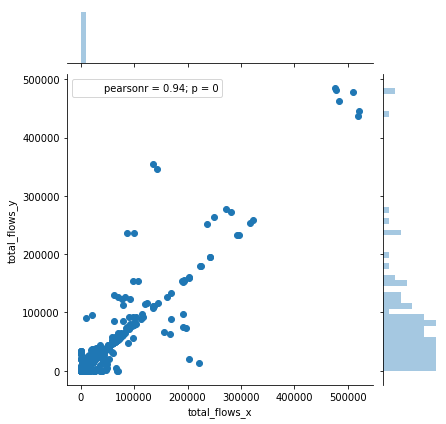

In [82]:
sns.jointplot(x='total_flows_x',y='total_flows_y',data=df33_2500_jump,kind='scatter')
plt.xlim([1,10])
#plt.ylim([0,10])
#,xlim=[0,100],ylim=[0,1000]
plt.savefig("approximate 200-2500_Jump.png")

In [70]:
stats.pearsonr(df33_2500_jump.total_flows_y, df33_2500_jump.total_flows_x)

(0.94136328899729038, 0.0)

In [65]:
stats.spearmanr(df33_2500_jump.total_flows_y, df33_2500_jump.total_flows_x)

SpearmanrResult(correlation=0.85120235356483931, pvalue=0.0)